# **Práctica 5: ACP y ACD**

Nombre: Pieter Alexander van der Werff Vargas

Número de cuenta: 316246435

Email: pieter.vanderwerff@ingenieria.unam.edu

### **Importar las bibliotecas y los datos**

In [1]:
import pandas as pd                         # Para la manipulación y análisis de datos
import numpy as np                          # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt             # Para la generación de gráficas a partir de los datos
import seaborn as sns                       # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [2]:
Spotify = pd.read_csv("Datos/spotify_top_charts_22.csv")
Spotify

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,spotify:track:0So2sgVa8aJiARPl2P29u2,SALES,Pope Is a Rockstar,108,5,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,90.024,4,187333
642,spotify:track:1TUuhV75FeOF6UObRsABo2,Morgan Wallen,Don't Think Jesus,96,1,0.578,0.431,2,-7.034,1,0.0269,0.4690,0.000000,0.1370,116.979,3,226975
643,spotify:track:3GbQcjKWT7eVpUfzqwUjxv,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.872,0.422,1,-7.415,0,0.3630,0.0254,0.000000,0.1090,149.956,4,180666
644,spotify:track:7My9ca9QEIR8MvIOdIrTWA,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.730,0.785,9,-7.986,0,0.2430,0.1050,0.000000,0.0445,82.037,4,215120


## **I. Análisis de componentes principales (ACP)**

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

#### **Paso 1:** Hay evidencia de variables posiblemente correlacionadas.

In [12]:
CorrSpotify = Spotify.corr(method='pearson')
CorrSpotify

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
peak_rank,1.000000,-0.352513,-0.011647,0.064726,0.032814,0.030000,-0.024764,0.011428,-0.031194,0.068691,-0.001229,-0.019633,0.050590,-0.103052
weeks_on_chart,-0.352513,1.000000,-0.062471,-0.065588,0.017296,0.053077,0.024224,-0.111900,0.079944,-0.042685,-0.058650,-0.059967,0.004602,0.085232
danceability,-0.011647,-0.062471,1.000000,0.198659,0.048686,0.251823,-0.093857,0.161906,-0.256794,-0.210085,-0.043850,-0.123983,0.171192,-0.146848
energy,0.064726,-0.065588,0.198659,1.000000,0.032316,0.693982,0.002716,-0.015851,-0.593486,-0.086421,0.107749,0.044891,0.161359,0.014841
key,0.032814,0.017296,0.048686,0.032316,1.000000,0.014602,-0.133622,0.019584,-0.009935,-0.023292,-0.049959,-0.007750,0.052487,-0.015304
loudness,0.030000,0.053077,0.251823,0.693982,0.014602,1.000000,0.050395,-0.069213,-0.438896,-0.275508,0.084714,0.005892,0.084749,-0.072663
mode,-0.024764,0.024224,-0.093857,0.002716,-0.133622,0.050395,1.000000,-0.084125,0.007870,-0.002248,-0.038549,-0.039415,0.010159,0.011825
speechiness,0.011428,-0.111900,0.161906,-0.015851,0.019584,-0.069213,-0.084125,1.000000,0.016690,-0.103967,0.030005,0.065119,0.027899,-0.013127
acousticness,-0.031194,0.079944,-0.256794,-0.593486,-0.009935,-0.438896,0.007870,0.016690,1.000000,0.082146,-0.051540,-0.090607,-0.097380,-0.020754
instrumentalness,0.068691,-0.042685,-0.210085,-0.086421,-0.023292,-0.275508,-0.002248,-0.103967,0.082146,1.000000,-0.042919,-0.039019,-0.083326,0.036350


In [11]:
CorrSpotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, peak_rank to duration_ms
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   peak_rank         14 non-null     float64
 1   weeks_on_chart    14 non-null     float64
 2   danceability      14 non-null     float64
 3   energy            14 non-null     float64
 4   key               14 non-null     float64
 5   loudness          14 non-null     float64
 6   mode              14 non-null     float64
 7   speechiness       14 non-null     float64
 8   acousticness      14 non-null     float64
 9   instrumentalness  14 non-null     float64
 10  liveness          14 non-null     float64
 11  tempo             14 non-null     float64
 12  time_signature    14 non-null     float64
 13  duration_ms       14 non-null     float64
dtypes: float64(14)
memory usage: 2.2+ KB


In [10]:
Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               646 non-null    object 
 1   artist_names      646 non-null    object 
 2   track_name        646 non-null    object 
 3   peak_rank         646 non-null    int64  
 4   weeks_on_chart    646 non-null    int64  
 5   danceability      646 non-null    float64
 6   energy            646 non-null    float64
 7   key               646 non-null    int64  
 8   loudness          646 non-null    float64
 9   mode              646 non-null    int64  
 10  speechiness       646 non-null    float64
 11  acousticness      646 non-null    float64
 12  instrumentalness  646 non-null    float64
 13  liveness          646 non-null    float64
 14  tempo             646 non-null    float64
 15  time_signature    646 non-null    int64  
 16  duration_ms       646 non-null    int64  
dt

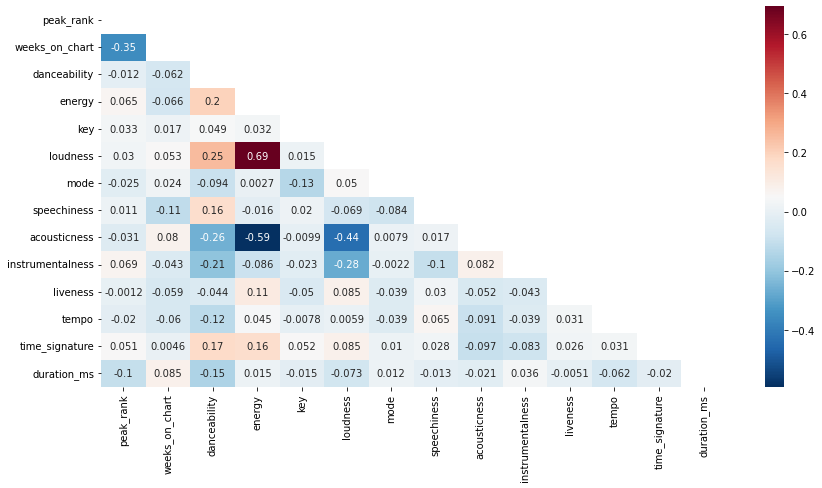

In [5]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrSpotify)
sns.heatmap(CorrSpotify, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

#### **Paso 2:** Se hace una estandarización de los datos

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
Estandarizar = StandardScaler()                                  # Se instancia el objeto StandardScaler o MinMaxScaler 
#Estandarizar = MinMaxScaler()
NuevaMatriz = Spotify.drop(columns=['uri','artist_names','track_name'])    # Se quitan las variables nominales
MEstandarizada = Estandarizar.fit_transform(NuevaMatriz)         # Se calculan la media y desviación para cada variable, y se escalan los datos

In [14]:
pd.DataFrame(MEstandarizada, columns=NuevaMatriz.columns)

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,-1.139786,1.204233,0.571789,-0.700547,1.633733,-0.207191,0.855514,-0.150825,0.702389,-0.175877,-0.631153,-1.423971,0.207290,0.640432
1,-1.139786,0.463192,-0.550993,0.744869,-1.129072,0.332149,0.855514,-0.602398,-0.828526,-0.175963,-0.549620,1.728964,0.207290,-1.125623
2,-1.104673,-0.436644,0.908623,0.575532,-0.300231,0.356145,-1.168889,-0.259555,-0.395205,-0.143305,-0.636389,-1.030181,0.207290,-0.178862
3,-1.104673,0.039740,0.353837,0.859777,1.633733,0.735893,-1.168889,1.530084,-0.071262,-0.175963,1.926287,-1.560592,0.207290,-0.550739
4,-1.139786,-0.013192,0.135885,-0.609830,-0.300231,0.252924,0.855514,-0.592603,0.165025,-0.175963,1.425121,0.029754,0.207290,-0.637750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,0.738714,-0.383713,0.334023,-1.178320,-0.300231,-0.991064,-1.168889,-0.794390,2.264936,2.948396,-0.519700,-1.099890,0.207290,-0.296716
642,0.528041,-0.489576,-0.636853,-1.269037,-0.852792,-0.258231,0.855514,-0.812022,0.812911,-0.175963,-0.295298,-0.145598,-2.641844,0.425044
643,0.352480,-0.489576,1.304899,-1.323466,-1.129072,-0.403350,-1.168889,2.480249,-0.877689,-0.175963,-0.504740,1.021892,0.207290,-0.418102
644,1.212727,-0.489576,0.367046,0.871873,1.081172,-0.620838,-1.168889,1.304788,-0.574326,-0.175963,-0.987205,-1.382655,0.207290,0.209200


#### **Pasos 3 y 4:** Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores)

In [15]:
pca = PCA(n_components=None)     # pca=PCA(n_components=None), pca=PCA(.85)
pca.fit(MEstandarizada)          # Se obtiene los componentes
print(pca.components_)

[[-6.05453117e-02  6.48561286e-02 -3.14932666e-01 -5.41815826e-01
  -4.13978368e-02 -5.23109495e-01  1.40534642e-02 -2.96456875e-02
   4.75997227e-01  2.20808273e-01 -9.23258581e-02 -4.01517329e-02
  -1.82166201e-01  6.55505847e-02]
 [-5.61245902e-01  6.17935211e-01 -1.25210519e-01  7.52324633e-02
  -1.00323698e-01  1.70797325e-01  2.12003755e-01 -2.95038603e-01
  -3.96135088e-02 -9.00786865e-02 -4.41468630e-02 -1.03932864e-01
  -6.74144785e-02  2.89158223e-01]
 [ 2.93720753e-01 -2.29557006e-01 -4.48442228e-01  2.20204295e-01
  -2.70453287e-01  9.26553174e-02  3.04444992e-01 -4.09059903e-01
  -1.72685851e-01  4.02745951e-01  1.39491674e-01  9.05573738e-02
  -1.79084870e-01  1.33940026e-01]
 [-2.38729084e-01 -1.44022084e-02 -2.47819758e-01  8.95243900e-03
  -1.87895663e-01 -4.01064639e-02 -1.58723781e-01  3.32821569e-01
  -3.24574871e-02 -1.73245465e-01  4.88659621e-01  6.49171492e-01
  -8.10544701e-02  1.02860683e-01]
 [ 3.95654359e-03  8.93300462e-02 -1.67320954e-01  1.39605564e-01
  

#### **Paso 5:** Se decide el número de componentes principales

* Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [16]:
Varianza = pca.explained_variance_ratio_
print('Porporción de varianza:', Varianza)
print('Varianza acumulada:', sum(Varianza[0:3]))   
#Con 3 componentes se tiene el 88% de varianza acumulada y con 4 el 93%

Porporción de varianza: [0.17377581 0.10380017 0.09339511 0.08041247 0.07838429 0.07231542
 0.06948291 0.06843113 0.06294295 0.05720189 0.04883843 0.03957836
 0.03475187 0.01668919]
Varianza acumulada: 0.370971082922975


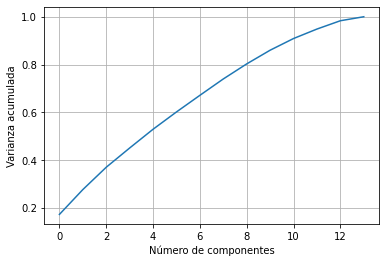

In [17]:
# Se grafica la varianza acumulada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **Paso 6:** Se examina la proporción de relevancias –cargas–

La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [18]:
print(pd.DataFrame(abs(pca.components_)))

          0         1         2         3         4         5         6   \
0   0.060545  0.064856  0.314933  0.541816  0.041398  0.523109  0.014053   
1   0.561246  0.617935  0.125211  0.075232  0.100324  0.170797  0.212004   
2   0.293721  0.229557  0.448442  0.220204  0.270453  0.092655  0.304445   
3   0.238729  0.014402  0.247820  0.008952  0.187896  0.040106  0.158724   
4   0.003957  0.089330  0.167321  0.139606  0.611180  0.036771  0.564267   
5   0.011149  0.151327  0.130948  0.040805  0.227068  0.062637  0.107246   
6   0.046145  0.053560  0.043847  0.014492  0.000169  0.164937  0.316547   
7   0.090771  0.113301  0.088853  0.054062  0.160186  0.022238  0.004520   
8   0.239181  0.118880  0.258071  0.038131  0.482254  0.142509  0.341917   
9   0.232370  0.053801  0.022300  0.098429  0.413591  0.028539  0.493556   
10  0.417880  0.499576  0.383070  0.177922  0.157483  0.257881  0.145757   
11  0.484143  0.465921  0.498902  0.210145  0.017600  0.119387  0.153916   
12  0.079895

In [19]:
CargasComponentes = pd.DataFrame(pca.components_, columns=NuevaMatriz.columns)
CargasComponentes

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,-0.060545,0.064856,-0.314933,-0.541816,-0.041398,-0.523109,0.014053,-0.029646,0.475997,0.220808,-0.092326,-0.040152,-0.182166,0.065551
1,-0.561246,0.617935,-0.125211,0.075232,-0.100324,0.170797,0.212004,-0.295039,-0.039614,-0.090079,-0.044147,-0.103933,-0.067414,0.289158
2,0.293721,-0.229557,-0.448442,0.220204,-0.270453,0.092655,0.304445,-0.409060,-0.172686,0.402746,0.139492,0.090557,-0.179085,0.133940
3,-0.238729,-0.014402,-0.247820,0.008952,-0.187896,-0.040106,-0.158724,0.332822,-0.032457,-0.173245,0.488660,0.649171,-0.081054,0.102861
4,0.003957,0.089330,-0.167321,0.139606,0.611180,-0.036771,-0.564267,-0.127801,-0.143035,0.313374,-0.042834,0.093764,-0.027856,0.323776
5,0.011149,-0.151327,0.130948,0.040805,-0.227068,-0.062637,-0.107246,0.320158,-0.036685,0.046350,0.336678,-0.559629,-0.109324,0.588808
6,-0.046145,0.053560,0.043847,-0.014492,-0.000169,0.164937,-0.316547,-0.201468,0.058526,-0.064098,0.330727,-0.237227,-0.667169,-0.454499
7,-0.090771,-0.113301,0.088853,0.054062,-0.160186,0.022238,-0.004520,0.296702,-0.217852,0.042096,-0.639408,0.185045,-0.583891,0.143720
8,-0.239181,0.118880,0.258071,0.038131,-0.482254,-0.142509,-0.341917,-0.021046,-0.163555,0.581108,-0.023726,0.026871,0.252390,-0.246892
9,-0.232370,0.053801,0.022300,0.098429,0.413591,-0.028539,0.493556,0.429621,-0.080988,0.456917,0.210436,-0.075903,-0.111029,-0.234895


In [23]:
CargasComponentes.head(9)

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,0.060545,0.064856,0.314933,0.541816,0.041398,0.523109,0.014053,0.029646,0.475997,0.220808,0.092326,0.040152,0.182166,0.065551
1,0.561246,0.617935,0.125211,0.075232,0.100324,0.170797,0.212004,0.295039,0.039614,0.090079,0.044147,0.103933,0.067414,0.289158
2,0.293721,0.229557,0.448442,0.220204,0.270453,0.092655,0.304445,0.409060,0.172686,0.402746,0.139492,0.090557,0.179085,0.133940
3,0.238729,0.014402,0.247820,0.008952,0.187896,0.040106,0.158724,0.332822,0.032457,0.173245,0.488660,0.649171,0.081054,0.102861
4,0.003957,0.089330,0.167321,0.139606,0.611180,0.036771,0.564267,0.127801,0.143035,0.313374,0.042834,0.093764,0.027856,0.323776
5,0.011149,0.151327,0.130948,0.040805,0.227068,0.062637,0.107246,0.320158,0.036685,0.046350,0.336678,0.559629,0.109324,0.588808
6,0.046145,0.053560,0.043847,0.014492,0.000169,0.164937,0.316547,0.201468,0.058526,0.064098,0.330727,0.237227,0.667169,0.454499
7,0.090771,0.113301,0.088853,0.054062,0.160186,0.022238,0.004520,0.296702,0.217852,0.042096,0.639408,0.185045,0.583891,0.143720
8,0.239181,0.118880,0.258071,0.038131,0.482254,0.142509,0.341917,0.021046,0.163555,0.581108,0.023726,0.026871,0.252390,0.246892


In [20]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=NuevaMatriz.columns)
CargasComponentes

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,0.060545,0.064856,0.314933,0.541816,0.041398,0.523109,0.014053,0.029646,0.475997,0.220808,0.092326,0.040152,0.182166,0.065551
1,0.561246,0.617935,0.125211,0.075232,0.100324,0.170797,0.212004,0.295039,0.039614,0.090079,0.044147,0.103933,0.067414,0.289158
2,0.293721,0.229557,0.448442,0.220204,0.270453,0.092655,0.304445,0.409060,0.172686,0.402746,0.139492,0.090557,0.179085,0.133940
3,0.238729,0.014402,0.247820,0.008952,0.187896,0.040106,0.158724,0.332822,0.032457,0.173245,0.488660,0.649171,0.081054,0.102861
4,0.003957,0.089330,0.167321,0.139606,0.611180,0.036771,0.564267,0.127801,0.143035,0.313374,0.042834,0.093764,0.027856,0.323776
5,0.011149,0.151327,0.130948,0.040805,0.227068,0.062637,0.107246,0.320158,0.036685,0.046350,0.336678,0.559629,0.109324,0.588808
6,0.046145,0.053560,0.043847,0.014492,0.000169,0.164937,0.316547,0.201468,0.058526,0.064098,0.330727,0.237227,0.667169,0.454499
7,0.090771,0.113301,0.088853,0.054062,0.160186,0.022238,0.004520,0.296702,0.217852,0.042096,0.639408,0.185045,0.583891,0.143720
8,0.239181,0.118880,0.258071,0.038131,0.482254,0.142509,0.341917,0.021046,0.163555,0.581108,0.023726,0.026871,0.252390,0.246892
9,0.232370,0.053801,0.022300,0.098429,0.413591,0.028539,0.493556,0.429621,0.080988,0.456917,0.210436,0.075903,0.111029,0.234895


In [24]:
CargasComponentes.head(9)

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,0.060545,0.064856,0.314933,0.541816,0.041398,0.523109,0.014053,0.029646,0.475997,0.220808,0.092326,0.040152,0.182166,0.065551
1,0.561246,0.617935,0.125211,0.075232,0.100324,0.170797,0.212004,0.295039,0.039614,0.090079,0.044147,0.103933,0.067414,0.289158
2,0.293721,0.229557,0.448442,0.220204,0.270453,0.092655,0.304445,0.409060,0.172686,0.402746,0.139492,0.090557,0.179085,0.133940
3,0.238729,0.014402,0.247820,0.008952,0.187896,0.040106,0.158724,0.332822,0.032457,0.173245,0.488660,0.649171,0.081054,0.102861
4,0.003957,0.089330,0.167321,0.139606,0.611180,0.036771,0.564267,0.127801,0.143035,0.313374,0.042834,0.093764,0.027856,0.323776
5,0.011149,0.151327,0.130948,0.040805,0.227068,0.062637,0.107246,0.320158,0.036685,0.046350,0.336678,0.559629,0.109324,0.588808
6,0.046145,0.053560,0.043847,0.014492,0.000169,0.164937,0.316547,0.201468,0.058526,0.064098,0.330727,0.237227,0.667169,0.454499
7,0.090771,0.113301,0.088853,0.054062,0.160186,0.022238,0.004520,0.296702,0.217852,0.042096,0.639408,0.185045,0.583891,0.143720
8,0.239181,0.118880,0.258071,0.038131,0.482254,0.142509,0.341917,0.021046,0.163555,0.581108,0.023726,0.026871,0.252390,0.246892


In [27]:
DatosSpotifyACP = Spotify.drop(columns=['danceability', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'])
DatosSpotifyACP

,uri,artist_names,track_name,peak_rank,weeks_on_chart,energy,key,loudness,mode,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.525,11,-6.900,1,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.764,1,-5.484,1,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.736,4,-5.421,0,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.783,11,-4.424,0,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.540,4,-5.692,1,121.932,4,168602
...,...,...,...,...,...,...,...,...,...,...,...,...
641,spotify:track:0So2sgVa8aJiARPl2P29u2,SALES,Pope Is a Rockstar,108,5,0.446,4,-8.958,0,90.024,4,187333
642,spotify:track:1TUuhV75FeOF6UObRsABo2,Morgan Wallen,Don't Think Jesus,96,1,0.431,2,-7.034,1,116.979,3,226975
643,spotify:track:3GbQcjKWT7eVpUfzqwUjxv,"Lil Nas X, YoungBoy Never Broke Again",Late To Da Party (F*CK BET) (feat. YoungBoy Ne...,86,1,0.422,1,-7.415,0,149.956,4,180666
644,spotify:track:7My9ca9QEIR8MvIOdIrTWA,"Eminem, Snoop Dogg",From The D 2 The LBC (with Snoop Dogg),135,1,0.785,9,-7.986,0,82.037,4,215120


## **II. Análisis correlacional de datos (ACD)**

 **Evaluación visual**

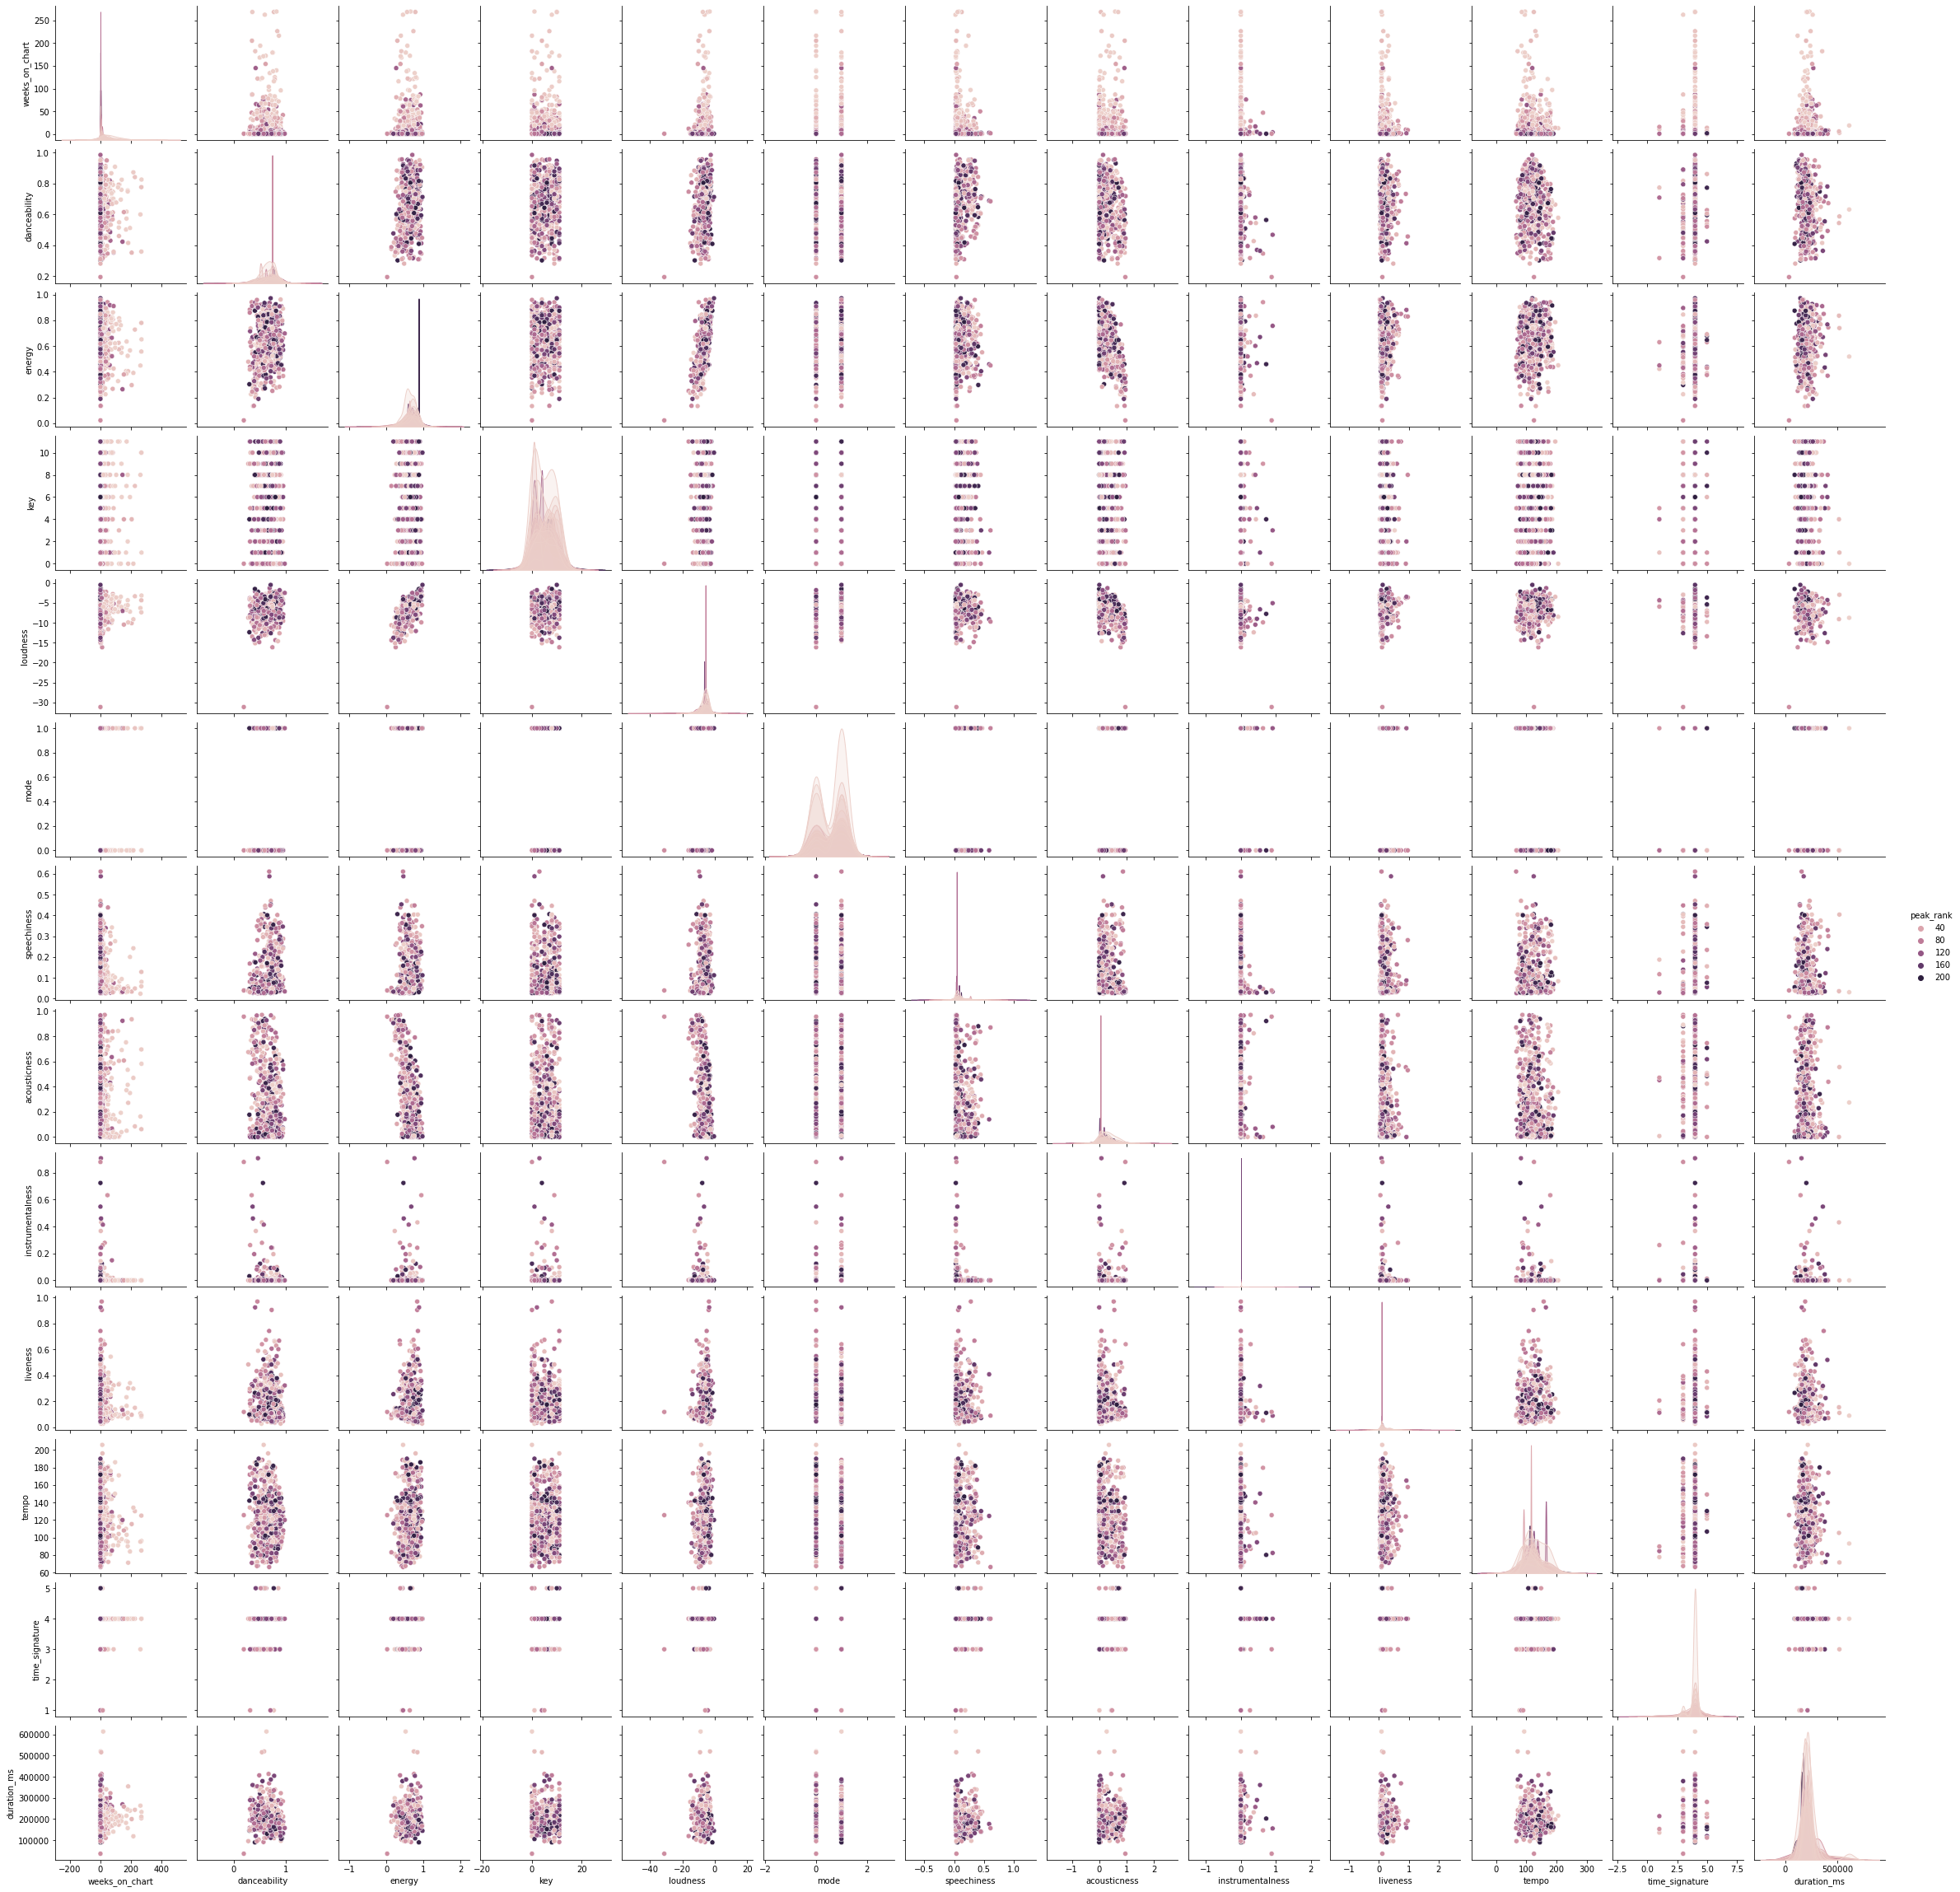

In [28]:
sns.pairplot(Spotify, hue='peak_rank')
plt.show()

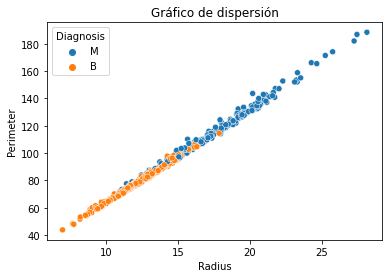

In [15]:
sns.scatterplot(x='Radius', y ='Perimeter', data=BCancer, hue='Diagnosis')
plt.title('Gráfico de dispersión')
plt.xlabel('Radius')
plt.ylabel('Perimeter')
plt.show()

In [16]:
CorrBCancer = BCancer.corr(method='pearson')
CorrBCancer

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [17]:
print(CorrBCancer['Radius'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores 

Radius              1.000000
Perimeter           0.997855
Area                0.987357
ConcavePoints       0.822529
Concavity           0.676764
Compactness         0.506124
Texture             0.323782
Smoothness          0.170581
Symmetry            0.147741
FractalDimension   -0.311631
Name: Radius, dtype: float64 



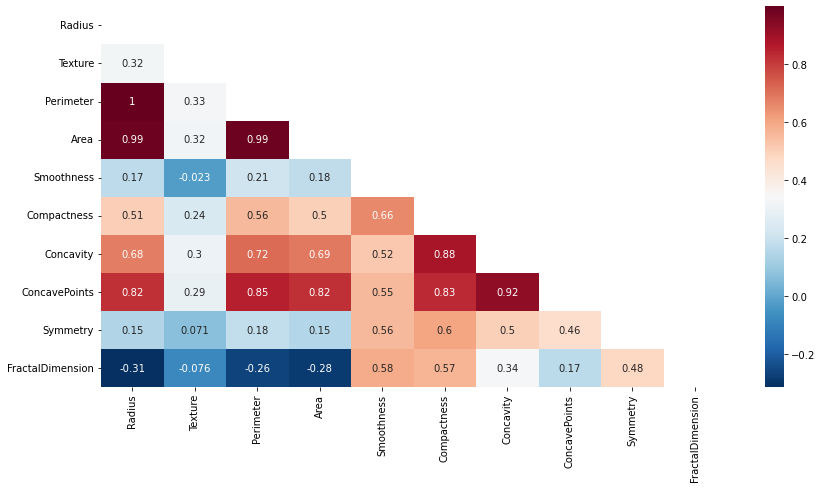

In [18]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrBCancer)
sns.heatmap(CorrBCancer, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

1) FractalDimension

2) Symmetry

3) Textura

4) Smoothness

5) Area

6) Compactness

In [19]:
DatosCancerACD = BCancer.drop(columns=['IDNumber', 'Radius', 'Perimeter', 'ConcavePoints', 'Concavity'])
DatosCancerACD 

,Diagnosis,Texture,Area,Smoothness,Compactness,Symmetry,FractalDimension
0,M,10.38,1001.0,0.11840,0.27760,0.2419,0.07871
1,M,17.77,1326.0,0.08474,0.07864,0.1812,0.05667
2,M,21.25,1203.0,0.10960,0.15990,0.2069,0.05999
3,M,20.38,386.1,0.14250,0.28390,0.2597,0.09744
4,M,14.34,1297.0,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...,...
564,M,22.39,1479.0,0.11100,0.11590,0.1726,0.05623
565,M,28.25,1261.0,0.09780,0.10340,0.1752,0.05533
566,M,28.08,858.1,0.08455,0.10230,0.1590,0.05648
567,M,29.33,1265.0,0.11780,0.27700,0.2397,0.07016
